In [2]:
# Set project folder path so we can access all the files
import sys
import os

py_file_location = "/content/drive/MyDrive/Drug Response Prediction"
sys.path.append(os.path.abspath(py_file_location))


In [3]:
# Install necessary dependency
!pip install -r requirements.txt


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Install libraries
import warnings
import numpy as np
import pandas as pd
from os import walk
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

from collections import OrderedDict
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.applications import VGG16
from skimage.transform import resize
from Feature_extraction import *

warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Data

In [5]:
drug_gene_df = merge_gene_drug_data()

/content/drive/MyDrive/Drug Response Prediction/Feature_extraction.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gene_exp_df[retained_column_names] = gene_pca
/content/drive/MyDrive/Drug Response Prediction/Feature_extraction.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gene_exp_df[retained_column_names] = gene_pca
/content/drive/MyDrive/Drug Response Prediction/Feature_extraction.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

In [6]:
drug_gene_df

,cell_line,DRUG_ID,dose,viability,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,...,ABCC9,GAL,CLEC2D,FUNDC1,MAOB,RORA,DRD4,TGFBR3,PLA2G10,HES2
0,ACH-000114,1032,0.500000,0.765152,-25.533604,27.127102,-6.529638,-13.803403,-0.797693,9.359538,...,0.041681,-0.112318,-0.043794,-0.085677,0.117449,-0.075984,-0.015488,0.032866,-0.065069,-0.057250
1,ACH-000114,1032,0.250000,0.941400,-25.533604,27.127102,-6.529638,-13.803403,-0.797693,9.359538,...,0.041681,-0.112318,-0.043794,-0.085677,0.117449,-0.075984,-0.015488,0.032866,-0.065069,-0.057250
2,ACH-000114,1032,0.125000,0.796375,-25.533604,27.127102,-6.529638,-13.803403,-0.797693,9.359538,...,0.041681,-0.112318,-0.043794,-0.085677,0.117449,-0.075984,-0.015488,0.032866,-0.065069,-0.057250
3,ACH-000114,1032,0.062500,0.916030,-25.533604,27.127102,-6.529638,-13.803403,-0.797693,9.359538,...,0.041681,-0.112318,-0.043794,-0.085677,0.117449,-0.075984,-0.015488,0.032866,-0.065069,-0.057250
4,ACH-000114,1032,0.031250,0.867244,-25.533604,27.127102,-6.529638,-13.803403,-0.797693,9.359538,...,0.041681,-0.112318,-0.043794,-0.085677,0.117449,-0.075984,-0.015488,0.032866,-0.065069,-0.057250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107352,ACH-000902,1032,0.039062,0.799816,5.484992,9.494834,-32.745574,10.893642,4.437922,-4.596756,...,-0.005931,0.043011,-0.091460,-0.074397,-0.016529,-0.026587,0.096887,-0.001995,0.020507,0.100468
107353,ACH-000902,1032,10.000000,0.293989,5.484992,9.494834,-32.745574,10.893642,4.437922,-4.596756,...,-0.005931,0.043011,-0.091460,-0.074397,-0.016529,-0.026587,0.096887,-0.001995,0.020507,0.100468
107354,ACH-000902,1032,5.000000,0.499927,5.484992,9.494834,-32.745574,10.893642,4.437922,-4.596756,...,-0.005931,0.043011,-0.091460,-0.074397,-0.016529,-0.026587,0.096887,-0.001995,0.020507,0.100468
107355,ACH-000902,1032,2.500000,0.622763,5.484992,9.494834,-32.745574,10.893642,4.437922,-4.596756,...,-0.005931,0.043011,-0.091460,-0.074397,-0.016529,-0.026587,0.096887,-0.001995,0.020507,0.100468


# Data Spliting

In [7]:
X = drug_gene_df.drop(['cell_line','viability'],axis=1)

In [8]:
Y = drug_gene_df['viability']

In [9]:
# Split the dataset into training and testing sets, ensuring stratification based on the 'dose' column
# X_train: Training features, X_test: Testing features, Y_train: Training target, Y_test: Testing target
# X: Features DataFrame, Y: Target Series
# test_size: The proportion of the dataset to include in the test split
# random_state: Seed for the random number generator for reproducibility
# shuffle: Whether to shuffle the data before splitting
# stratify: Ensure that the distribution of 'dose' column is similar in both training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.07, random_state=42,shuffle=True, stratify=X['dose'])

In [ ]:
# Normalize the data
def normalize_data(x_train,x_test):
  ss = StandardScaler()
  X_train = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
  X_test = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

  return X_train,X_test


In [10]:
X_train

,DRUG_ID,dose,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,...,ABCC9,GAL,CLEC2D,FUNDC1,MAOB,RORA,DRD4,TGFBR3,PLA2G10,HES2
99279,1032,3.162555,58.752082,-3.786931,-3.311333,-21.996356,-9.139620,-2.763757,0.191014,-9.469912,...,-0.038634,0.025895,0.101681,0.112134,-0.074450,0.086248,0.089289,-0.027115,-0.041062,0.138447
54176,1012,0.156250,61.367685,8.430505,7.751490,-12.219610,-6.534492,0.147077,-2.207352,13.723798,...,0.273532,0.006239,-0.228966,-0.172399,0.027643,-0.004827,0.023171,0.027981,-0.026912,-0.137381
10757,1003,0.031626,5.234504,12.499801,-20.514141,0.700741,10.573348,-14.512707,-4.894339,-4.350308,...,0.214273,0.099643,0.006665,-0.072750,-0.025656,0.048880,-0.159595,0.121234,-0.017169,-0.075110
25274,1032,10.000000,4.925879,-25.580468,-17.306354,5.635816,-10.356705,0.602016,11.520607,-13.855816,...,0.058028,-0.020737,-0.048020,0.234424,0.067732,-0.087293,0.098466,-0.222281,-0.005626,-0.017968
20401,1004,0.003125,-18.107286,27.214131,-13.302926,-7.332632,-11.814043,13.901815,-3.563822,-10.605098,...,0.215917,0.033316,-0.140167,-0.001455,-0.061214,0.184552,0.104488,0.028532,0.084838,0.038739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48085,1057,0.001953,-2.546010,-20.949028,6.305283,1.042612,34.185577,20.845660,0.548089,-6.615956,...,-0.285448,-0.148664,0.180461,0.003291,-0.333220,0.233930,0.021337,0.015094,0.042401,-0.015668
47346,1004,0.000781,0.002765,41.570229,-17.304025,1.787422,19.524583,-17.716687,10.741487,3.696205,...,-0.076082,0.112199,0.077663,0.090156,0.227256,-0.092505,0.211763,0.067530,-0.241527,-0.041962
92688,1006,0.020007,-18.242078,33.881450,5.895377,0.965479,-12.292303,11.555476,-8.932292,-1.564781,...,0.212120,0.056873,0.100902,-0.084505,0.058248,-0.069317,-0.007144,-0.106921,-0.092294,-0.082589
18450,1012,0.156250,41.567526,-4.439512,-2.066016,-17.373661,3.758267,-3.110786,13.649732,-28.539726,...,0.504809,-0.103535,0.260265,0.005379,0.245088,0.053729,-0.010841,0.302983,-0.240397,-0.035067


In [ ]:
min(X_test.dose),max(X_test.dose)

(9.765625e-05, 10.0)

# Modeling
## XGBRegressor

In [ ]:
params = {
    'n_estimators': 50,
    'learning_rate': 0.1,
    'max_depth': 3,
    'gamma': 0.1,
    'subsample': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0
}

# Initialize the XGBoost regressor
xgb_regressor = XGBRegressor(**params)

# Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)

# Fit the GridSearchCV to the training data

# Print the best hyperparameters found
# print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
# best_xgb_regressor = grid_search.best_estimator_

# Initialize lists to store evaluation metrics for each fold
mse_scores = []
rmse_scores = []
evs_scores = []
percentage_errors = []

# k-fold cross-validation
num_folds = 5

# Initialize the KFold object
cv = KFold(n_splits=num_folds, shuffle=True, random_state=43)

# Perform k-fold cross-validation and get the cross-validated MSE scores
for i, (train_ix, test_ix) in enumerate(cv.split(X)):

    # Split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]

    # Normalize data
    # X_train,X_test = normalize_data(X_train, X_test)

    # Fit XGBRegressor model
    xgb_regressor.fit(X_train, Y_train)

    # Make predictions on the test data using the best model
    y_pred = xgb_regressor.predict(X_test)

    # Calculate evaluation metrics for this fold
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    evs = explained_variance_score(Y_test, y_pred)
    per_error = mean_absolute_error(Y_test, y_pred)

    # Store evaluation metrics for this fold
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    evs_scores.append(evs)
    percentage_errors.append(per_error)

    # Print evaluation metrics for this fold
    print(f"Fold {i+1} - MSE: {mse}, RMSE: {rmse}, EVS: {evs}, PER: {per_error}")

# Calculate average evaluation metrics across all folds
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_evs = np.mean(evs_scores)
avg_per = np.mean(percentage_errors)

# Print average evaluation metrics
print(f"\nAverage MSE across {num_folds} folds: {avg_mse}")
print(f"Average RMSE across {num_folds} folds: {avg_rmse}")
print(f"Average EVS across {num_folds} folds: {avg_evs}")
print(f"Average Percentage Error across {num_folds} folds: {avg_per}")


Fold 1 - MSE: 0.038655371383835846, RMSE: 0.19660969300580236, EVS: 0.5124811220528017, PER: 0.15474004218733475
Fold 2 - MSE: 0.0407911686921453, RMSE: 0.20196823683972018, EVS: 0.49702288040432163, PER: 0.15976889099234134
Fold 3 - MSE: 0.039624534522213845, RMSE: 0.19905912318257069, EVS: 0.5071003590001038, PER: 0.15689727924251304
Fold 4 - MSE: 0.03938777200152395, RMSE: 0.19846352813936355, EVS: 0.5100865587984678, PER: 0.15681367542308133
Fold 5 - MSE: 0.039958389539539764, RMSE: 0.19989594678116854, EVS: 0.49926769432704987, PER: 0.1579072689412447

Average MSE across 5 folds: 0.039683447227851734
Average RMSE across 5 folds: 0.19919930558972504
Average EVS across 5 folds: 0.505191722916549
Average Percentage Error across 5 folds: 0.15722543135730305


## Plot Regression Line



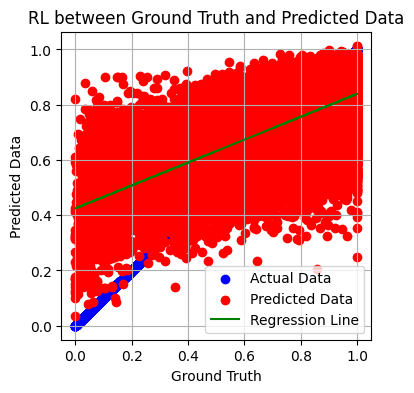

In [ ]:
predicted_data = np.array(y_pred)  # Sample predicted data
slope, intercept = np.polyfit(Y_test, predicted_data, 1)
regression_line = slope * Y_test + intercept

# Plot actual data and predicted data
plt.figure(figsize=(4, 4))
plt.scatter(Y_test, Y_test, color='blue', label='Actual Data')
plt.scatter(Y_test, predicted_data, color='red', label='Predicted Data')
plt.plot(Y_test, regression_line, color='green', label='Regression Line')

# Add labels and title
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Data')
plt.title('RL between Ground Truth and Predicted Data')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

## Prepare Test DataFrame

In [ ]:
test_df = X_test[['DRUG_ID','dose']]
test_df['Actual_Viability'] = Y_test
test_df['Predicted_Viability'] = y_pred

filter = test_df[(test_df.Actual_Viability < 0.5)]
test_df.shape

<ipython-input-19-44c77c51cb45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Actual_Viability'] = Y_test
<ipython-input-19-44c77c51cb45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Viability'] = y_pred


(21471, 4)

## Calculate IC50

In [ ]:
drug_data = test_df[(test_df.DRUG_ID == 1004)]
drug_data

,DRUG_ID,dose,Actual_Viability,Predicted_Viability
31,1004,0.006250,0.736105,0.712064
32,1004,0.003125,1.000000,0.768031
33,1004,0.001563,0.797493,0.850383
35,1004,0.000391,0.977653,0.911276
88,1004,0.000316,0.978594,0.911276
...,...,...,...,...
106739,1004,0.010002,0.045102,0.547239
106740,1004,0.003163,0.077435,0.697498
106875,1004,0.010002,0.093364,0.650762
106876,1004,0.003163,0.147416,0.763392


In [ ]:
# Calculate the mean of each drug concentration
unique_dose = drug_data.dose.unique()

dic_conc_via = {'Concentration':[],'Actual_Mean':[],'Predicted_Mean':[]}

for val in unique_dose:
  values = drug_data[(drug_data.dose == val)]
  actual_mean = np.mean(values.Actual_Viability)
  predicted_mean = np.mean(values.Predicted_Viability)
  dic_conc_via['Concentration'].append(val)
  dic_conc_via['Actual_Mean'].append(actual_mean)
  dic_conc_via['Predicted_Mean'].append(predicted_mean)

drug_data_df = pd.DataFrame(dic_conc_via)
drug_data_df

,Concentration,Actual_Mean,Predicted_Mean
0,0.006250,0.546690,0.687510
1,0.003125,0.731898,0.752158
2,0.001563,0.883677,0.838509
3,0.000391,0.930657,0.899377
4,0.000316,0.953095,0.905270
5,0.025000,0.406526,0.491801
6,0.012500,0.433846,0.522428
7,0.010002,0.488497,0.656434
8,0.050000,0.355624,0.426440
9,0.031626,0.449483,0.491720


## Logarithmic Function

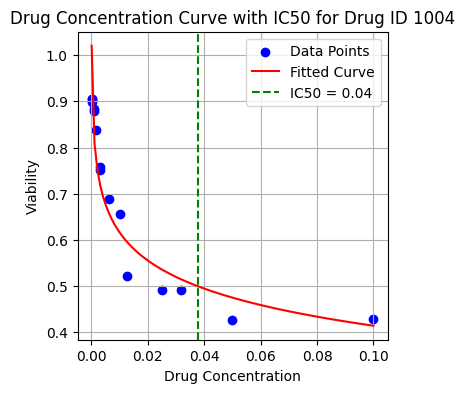

Estimated IC50: 0.03765028238856307


In [ ]:
dose = drug_data_df.Concentration  # Example dose values
viability = drug_data_df.Predicted_Mean # Example viability values

def logarithmic(x, A, B):
    return A * np.log(x) + B

# Fit the logarithmic curve to the data
popt, pcov = curve_fit(logarithmic, dose, viability)

# Extract the IC50 value
IC50 = np.exp((0.5 - popt[1]) / popt[0])

# Plot the dose-response curve and IC50
plt.figure(figsize=(4, 4))
plt.scatter(dose, viability, color='blue', label='Data Points')

# Generate x values for smooth curve
x_values = np.linspace(min(dose), max(dose), 100)

# Plot the fitted curve
plt.plot(x_values, logarithmic(x_values, *popt), color='red', label='Fitted Curve')

# Plot vertical line for IC50
plt.axvline(x=IC50, color='green', linestyle='--', label=f'IC50 = {IC50:.2f}')
plt.xlabel('Drug Concentration')
plt.ylabel('Viability')
plt.title('Drug Concentration Curve with IC50 for Drug ID 1004')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

print("Estimated IC50:", IC50)

## Linear Function

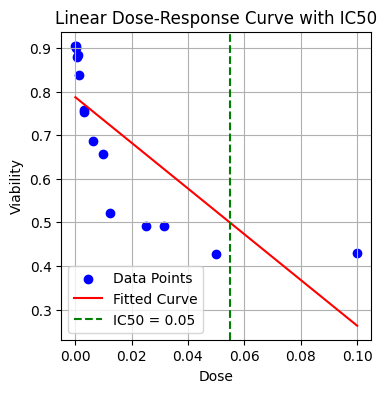

Estimated IC50: 0.05481431047221956


In [ ]:
dose = drug_data_df.Concentration
viability = drug_data_df.Predicted_Mean

# Define the linear function
def linear(x, m, c):
    return m * x + c

# Fit the linear curve to the data
popt, pcov = curve_fit(linear, dose, viability)

# Extract the IC50 value
IC50 = (0.5 - popt[1]) / popt[0]

# Plot the dose-response curve and IC50
plt.figure(figsize=(4, 4))
plt.scatter(dose, viability, color='blue', label='Data Points')

# Generate x values for smooth curve
x_values = np.linspace(min(dose), max(dose), 100)

# Plot the fitted curve
plt.plot(x_values, linear(x_values, *popt), color='red', label='Fitted Curve')

# Plot vertical line for IC50
plt.axvline(x=IC50, color='green', linestyle='--', label=f'IC50 = {IC50:.2f}')
plt.xlabel('Dose')
plt.ylabel('Viability')
plt.title('Linear Dose-Response Curve with IC50')
plt.legend()
plt.grid(True)
plt.show()

print("Estimated IC50:", IC50)

# Random Forest Regressor

In [ ]:
rf_regressor = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_features='sqrt',  # Number of features to consider when looking for the best split
    max_depth=None,  # Maximum depth of the tree
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    random_state=42,  # Random seed for reproducibility
    n_jobs=-1  # Use all available CPU cores
)

# Initialize lists to store evaluation metrics for each fold
mse_scores = []
rmse_scores = []
evs_scores = []
percentage_errors = []

# k-fold cross-validation
num_folds = 5

# Initialize the KFold object
cv = KFold(n_splits=num_folds, shuffle=True, random_state=43)

# Perform k-fold cross-validation and get the cross-validated MSE scores
for i, (train_ix, test_ix) in enumerate(cv.split(X)):

    # Split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]

    # Normalize data
    # X_train,X_test = normalize_data(X_train, X_test)

    # Fit XGBRegressor model
    rf_regressor.fit(X_train, Y_train)

    # Make predictions on the test data using the best model
    y_pred = rf_regressor.predict(X_test)

    # Calculate evaluation metrics for this fold
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    evs = explained_variance_score(Y_test, y_pred)
    per_error = mean_absolute_error(Y_test, y_pred)

    # Store evaluation metrics for this fold
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    evs_scores.append(evs)
    percentage_errors.append(per_error)

    # Print evaluation metrics for this fold
    print(f"Fold {i+1} - MSE: {mse}, RMSE: {rmse}, EVS: {evs}, PER: {per_error}")

# Calculate average evaluation metrics across all folds
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_evs = np.mean(evs_scores)
avg_per = np.mean(percentage_errors)

# Print average evaluation metrics
print(f"\nAverage MSE across {num_folds} folds: {avg_mse}")
print(f"Average RMSE across {num_folds} folds: {avg_rmse}")
print(f"Average EVS across {num_folds} folds: {avg_evs}")
print(f"Average Percentage Error across {num_folds} folds: {avg_per}")


Fold 1 - MSE: 0.02239683158000492, RMSE: 0.14965571014834322, EVS: 0.7184357962602357, PER: 0.10881084098468968
Fold 2 - MSE: 0.02363460006452777, RMSE: 0.15373548732978917, EVS: 0.7094546287979361, PER: 0.11176525081144502
Fold 3 - MSE: 0.023288259019520464, RMSE: 0.15260491151834027, EVS: 0.7111561993106709, PER: 0.11056693882789809
Fold 4 - MSE: 0.02328017424383448, RMSE: 0.15257841998079047, EVS: 0.7110408916948188, PER: 0.11079196562635017
Fold 5 - MSE: 0.023096061476070198, RMSE: 0.15197388419090366, EVS: 0.7116303106845536, PER: 0.11019731588082443

Average MSE across 5 folds: 0.023139185276791565
Average RMSE across 5 folds: 0.15210968263363334
Average EVS across 5 folds: 0.712343565349643
Average Percentage Error across 5 folds: 0.11042646242624148


## Plot Regression Line

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


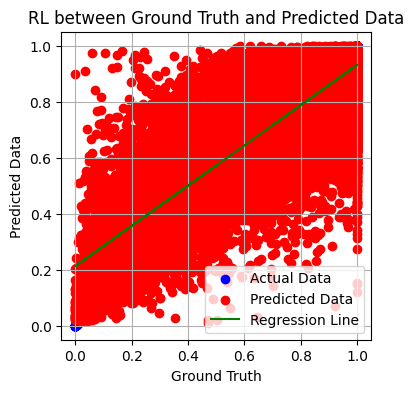

In [ ]:
predicted_data = np.array(y_pred)  # Sample predicted data
slope, intercept = np.polyfit(Y_test, predicted_data, 1)
regression_line = slope * Y_test + intercept

# Plot actual data and predicted data
plt.figure(figsize=(4, 4))
plt.scatter(Y_test, Y_test, color='blue', label='Actual Data')
plt.scatter(Y_test, predicted_data, color='red', label='Predicted Data')
plt.plot(Y_test, regression_line, color='green', label='Regression Line')

# Add labels and title
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Data')
plt.title('RL between Ground Truth and Predicted Data')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

## Prepare Test DataFrame

In [ ]:
test_df = X_test[['DRUG_ID','dose']]
test_df['Actual_Viability'] = Y_test
test_df['Predicted_Viability'] = y_pred

filter = test_df[(test_df.Actual_Viability < 0.5)]
test_df.shape

## Calculate IC50

In [ ]:
drug_data = test_df[(test_df.DRUG_ID == 1004)]
drug_data

,DRUG_ID,dose,Actual_Viability,Predicted_Viability
31,1004,0.006250,0.736105,0.712064
32,1004,0.003125,1.000000,0.768031
33,1004,0.001563,0.797493,0.850383
35,1004,0.000391,0.977653,0.911276
88,1004,0.000316,0.978594,0.911276
...,...,...,...,...
106739,1004,0.010002,0.045102,0.547239
106740,1004,0.003163,0.077435,0.697498
106875,1004,0.010002,0.093364,0.650762
106876,1004,0.003163,0.147416,0.763392


In [ ]:
# Calculate the mean of each drug concentration
unique_dose = drug_data.dose.unique()

dic_conc_via = {'Concentration':[],'Actual_Mean':[],'Predicted_Mean':[]}

for val in unique_dose:
  values = drug_data[(drug_data.dose == val)]
  actual_mean = np.mean(values.Actual_Viability)
  predicted_mean = np.mean(values.Predicted_Viability)
  dic_conc_via['Concentration'].append(val)
  dic_conc_via['Actual_Mean'].append(actual_mean)
  dic_conc_via['Predicted_Mean'].append(predicted_mean)

drug_data_df = pd.DataFrame(dic_conc_via)
drug_data_df

,Concentration,Actual_Mean,Predicted_Mean
0,0.006250,0.546690,0.687510
1,0.003125,0.731898,0.752158
2,0.001563,0.883677,0.838509
3,0.000391,0.930657,0.899377
4,0.000316,0.953095,0.905270
5,0.025000,0.406526,0.491801
6,0.012500,0.433846,0.522428
7,0.010002,0.488497,0.656434
8,0.050000,0.355624,0.426440
9,0.031626,0.449483,0.491720


## Using Logarithm Function

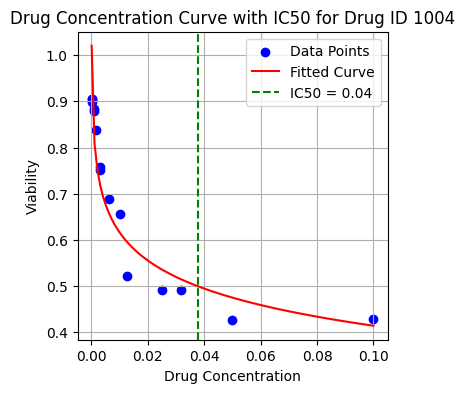

Estimated IC50: 0.03765028238856307


In [ ]:
dose = drug_data_df.Concentration  # Example dose values
viability = drug_data_df.Predicted_Mean # Example viability values

def logarithmic(x, A, B):
    return A * np.log(x) + B

# Fit the logarithmic curve to the data
popt, pcov = curve_fit(logarithmic, dose, viability)

# Extract the IC50 value
IC50 = np.exp((0.5 - popt[1]) / popt[0])

# Plot the dose-response curve and IC50
plt.figure(figsize=(4, 4))
plt.scatter(dose, viability, color='blue', label='Data Points')

# Generate x values for smooth curve
x_values = np.linspace(min(dose), max(dose), 100)

# Plot the fitted curve
plt.plot(x_values, logarithmic(x_values, *popt), color='red', label='Fitted Curve')

# Plot vertical line for IC50
plt.axvline(x=IC50, color='green', linestyle='--', label=f'IC50 = {IC50:.2f}')
plt.xlabel('Drug Concentration')
plt.ylabel('Viability')
plt.title('Drug Concentration Curve with IC50 for Drug ID 1004')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

print("Estimated IC50:", IC50)

## Linear Function

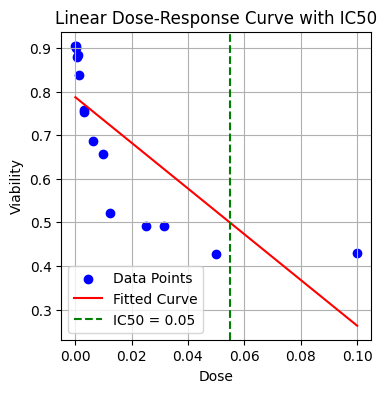

Estimated IC50: 0.05481431047221956


In [ ]:
dose = drug_data_df.Concentration
viability = drug_data_df.Predicted_Mean

# Define the linear function
def linear(x, m, c):
    return m * x + c

# Fit the linear curve to the data
popt, pcov = curve_fit(linear, dose, viability)

# Extract the IC50 value
IC50 = (0.5 - popt[1]) / popt[0]

# Plot the dose-response curve and IC50
plt.figure(figsize=(4, 4))
plt.scatter(dose, viability, color='blue', label='Data Points')

# Generate x values for smooth curve
x_values = np.linspace(min(dose), max(dose), 100)

# Plot the fitted curve
plt.plot(x_values, linear(x_values, *popt), color='red', label='Fitted Curve')

# Plot vertical line for IC50
plt.axvline(x=IC50, color='green', linestyle='--', label=f'IC50 = {IC50:.2f}')
plt.xlabel('Dose')
plt.ylabel('Viability')
plt.title('Linear Dose-Response Curve with IC50')
plt.legend()
plt.grid(True)
plt.show()

print("Estimated IC50:", IC50)

# KNeighborsRegressor

In [ ]:
knn_regressor = KNeighborsRegressor(
    n_neighbors=5,  # Number of neighbors to use
    weights='uniform',  # Weight function used in prediction
    algorithm='auto',  # Algorithm used to compute the nearest neighbors
)

# Initialize lists to store evaluation metrics for each fold
mse_scores = []
rmse_scores = []
evs_scores = []
percentage_errors = []

# k-fold cross-validation
num_folds = 5

# Initialize the KFold object
cv = KFold(n_splits=num_folds, shuffle=True, random_state=43)

# Perform k-fold cross-validation and get the cross-validated MSE scores
for i, (train_ix, test_ix) in enumerate(cv.split(X)):

    # Split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]

    # Normalize data
    # X_train,X_test = normalize_data(X_train, X_test)

    # Fit XGBRegressor model
    knn_regressor.fit(X_train, Y_train)

    # Make predictions on the test data using the best model
    y_pred = knn_regressor.predict(X_test)

    # Calculate evaluation metrics for this fold
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    evs = explained_variance_score(Y_test, y_pred)
    per_error = mean_absolute_error(Y_test, y_pred)

    # Store evaluation metrics for this fold
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    evs_scores.append(evs)
    percentage_errors.append(per_error)

    # Print evaluation metrics for this fold
    print(f"Fold {i+1} - MSE: {mse}, RMSE: {rmse}, EVS: {evs}, PER: {per_error}")

# Calculate average evaluation metrics across all folds
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_evs = np.mean(evs_scores)
avg_per = np.mean(percentage_errors)

# Print average evaluation metrics
print(f"\nAverage MSE across {num_folds} folds: {avg_mse}")
print(f"Average RMSE across {num_folds} folds: {avg_rmse}")
print(f"Average EVS across {num_folds} folds: {avg_evs}")
print(f"Average Percentage Error across {num_folds} folds: {avg_per}")

Fold 1 - MSE: 0.027633867299419697, RMSE: 0.1662343746023057, EVS: 0.672854723560266, PER: 0.11749844854762523
Fold 2 - MSE: 0.02895586366494399, RMSE: 0.17016422557325023, EVS: 0.6668954719000879, PER: 0.11961409568333849
Fold 3 - MSE: 0.028267935409027833, RMSE: 0.1681307092979383, EVS: 0.6706599334752874, PER: 0.11831614668351707
Fold 4 - MSE: 0.028358671087662737, RMSE: 0.16840032983240483, EVS: 0.6689376654714068, PER: 0.11868201300943211
Fold 5 - MSE: 0.028983279338105294, RMSE: 0.17024476302695862, EVS: 0.6605210172845773, PER: 0.11943430390655523

Average MSE across 5 folds: 0.02843992335983191
Average RMSE across 5 folds: 0.16863488046657152
Average EVS across 5 folds: 0.6679737623383251
Average Percentage Error across 5 folds: 0.11870900156609362


## Plot Regression Line

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


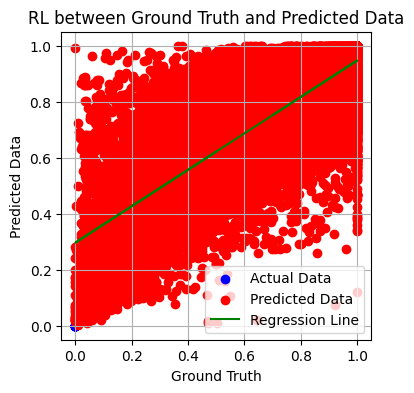

In [ ]:
predicted_data = np.array(y_pred)  # Sample predicted data
slope, intercept = np.polyfit(Y_test, predicted_data, 1)
regression_line = slope * Y_test + intercept

# Plot actual data and predicted data
plt.figure(figsize=(4, 4))
plt.scatter(Y_test, Y_test, color='blue', label='Actual Data')
plt.scatter(Y_test, predicted_data, color='red', label='Predicted Data')
plt.plot(Y_test, regression_line, color='green', label='Regression Line')

# Add labels and title
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Data')
plt.title('RL between Ground Truth and Predicted Data')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

## Prepare Test DataFrame

In [ ]:
test_df = X_test[['DRUG_ID','dose']]
test_df['Actual_Viability'] = Y_test
test_df['Predicted_Viability'] = y_pred

filter = test_df[(test_df.Predicted_Viability < 0.5)]
filter

<ipython-input-36-eab754baff80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Actual_Viability'] = Y_test
<ipython-input-36-eab754baff80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Viability'] = y_pred


,DRUG_ID,dose,Actual_Viability,Predicted_Viability
196,1494,0.100000,0.098237,0.167983
223,1006,2.000000,0.209763,0.292663
239,1012,10.000000,0.156901,0.198019
240,1012,5.000000,0.298952,0.415196
258,1004,0.025000,0.214437,0.246246
...,...,...,...,...
107301,1058,4.000000,0.232063,0.196981
107310,1003,0.010002,0.378378,0.436294
107321,1032,10.000000,0.409417,0.242550
107325,1058,1.265022,0.428812,0.418263


## Calculate IC50

In [ ]:
drug_data = test_df[(test_df.DRUG_ID == 1004)]
drug_data

,DRUG_ID,dose,Actual_Viability,Predicted_Viability
31,1004,0.006250,0.736105,0.883478
32,1004,0.003125,1.000000,0.883478
33,1004,0.001563,0.797493,0.883478
35,1004,0.000391,0.977653,0.883478
88,1004,0.000316,0.978594,0.883478
...,...,...,...,...
106739,1004,0.010002,0.045102,0.860097
106740,1004,0.003163,0.077435,0.860097
106875,1004,0.010002,0.093364,0.628528
106876,1004,0.003163,0.147416,0.628528


In [ ]:
# Calculate the mean of each drug concentration
unique_dose = drug_data.dose.unique()

dic_conc_via = {'Concentration':[],'Actual_Mean':[],'Predicted_Mean':[]}

for val in unique_dose:
  values = drug_data[(drug_data.dose == val)]
  actual_mean = np.mean(values.Actual_Viability)
  predicted_mean = np.mean(values.Predicted_Viability)
  dic_conc_via['Concentration'].append(val)
  dic_conc_via['Actual_Mean'].append(actual_mean)
  dic_conc_via['Predicted_Mean'].append(predicted_mean)

drug_data_df = pd.DataFrame(dic_conc_via)
drug_data_df

,Concentration,Actual_Mean,Predicted_Mean
0,0.006250,0.546690,0.689800
1,0.003125,0.731898,0.809338
2,0.001563,0.883677,0.859227
3,0.000391,0.930657,0.877629
4,0.000316,0.953095,0.901542
5,0.025000,0.406526,0.560314
6,0.012500,0.433846,0.641555
7,0.010002,0.488497,0.609302
8,0.050000,0.355624,0.486389
9,0.031626,0.449483,0.455540


## Logarithmic Function

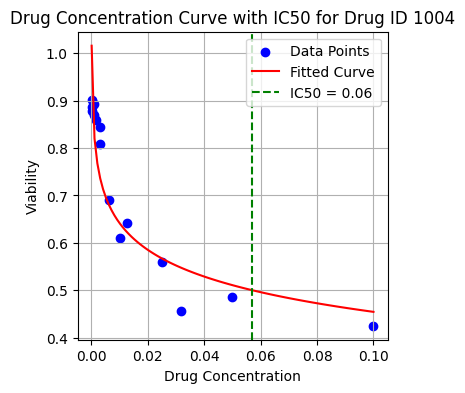

Estimated IC50: 0.05703189817406739


In [ ]:
dose = drug_data_df.Concentration  # Example dose values
viability = drug_data_df.Predicted_Mean # Example viability values

def logarithmic(x, A, B):
    return A * np.log(x) + B

# Fit the logarithmic curve to the data
popt, pcov = curve_fit(logarithmic, dose, viability)

# Extract the IC50 value
IC50 = np.exp((0.5 - popt[1]) / popt[0])

# Plot the dose-response curve and IC50
plt.figure(figsize=(4, 4))
plt.scatter(dose, viability, color='blue', label='Data Points')

# Generate x values for smooth curve
x_values = np.linspace(min(dose), max(dose), 100)

# Plot the fitted curve
plt.plot(x_values, logarithmic(x_values, *popt), color='red', label='Fitted Curve')

# Plot vertical line for IC50
plt.axvline(x=IC50, color='green', linestyle='--', label=f'IC50 = {IC50:.2f}')
plt.xlabel('Drug Concentration')
plt.ylabel('Viability')
plt.title('Drug Concentration Curve with IC50 for Drug ID 1004')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

print("Estimated IC50:", IC50)

# Linear Regression

In [ ]:
linear_regressor = LinearRegression()

# Initialize lists to store evaluation metrics for each fold
mse_scores = []
rmse_scores = []
evs_scores = []
percentage_errors = []

# k-fold cross-validation
num_folds = 5

# Initialize the KFold object
cv = KFold(n_splits=num_folds, shuffle=True, random_state=43)

# Perform k-fold cross-validation and get the cross-validated MSE scores
for i, (train_ix, test_ix) in enumerate(cv.split(X)):

    # Split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]

    # Normalize data
    # X_train,X_test = normalize_data(X_train, X_test)

    # Fit XGBRegressor model
    linear_regressor.fit(X_train, Y_train)

    # Make predictions on the test data using the best model
    y_pred = linear_regressor.predict(X_test)

    # Calculate evaluation metrics for this fold
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    evs = explained_variance_score(Y_test, y_pred)
    per_error = mean_absolute_error(Y_test, y_pred)

    # Store evaluation metrics for this fold
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    evs_scores.append(evs)
    percentage_errors.append(per_error)

    # Print evaluation metrics for this fold
    print(f"Fold {i+1} - MSE: {mse}, RMSE: {rmse}, EVS: {evs}, PER: {per_error}")

# Calculate average evaluation metrics across all folds
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_evs = np.mean(evs_scores)
avg_per = np.mean(percentage_errors)

# Print average evaluation metrics
print(f"\nAverage MSE across {num_folds} folds: {avg_mse}")
print(f"Average RMSE across {num_folds} folds: {avg_rmse}")
print(f"Average EVS across {num_folds} folds: {avg_evs}")
print(f"Average Percentage Error across {num_folds} folds: {avg_per}")

Fold 1 - MSE: 0.06108677092785691, RMSE: 0.24715738088889214, EVS: 0.22957485137461286, PER: 0.1991356641069961
Fold 2 - MSE: 0.06285885021983258, RMSE: 0.25071667319871765, EVS: 0.22496890373247747, PER: 0.2026032423586668
Fold 3 - MSE: 0.06174750241536637, RMSE: 0.24849044733221912, EVS: 0.23190597062153895, PER: 0.20085975609069803
Fold 4 - MSE: 0.06090026939674798, RMSE: 0.2467797994098139, EVS: 0.2425741841662611, PER: 0.19998457634159175
Fold 5 - MSE: 0.061765517834201665, RMSE: 0.2485266944096784, EVS: 0.2259906864731428, PER: 0.200802523418714

Average MSE across 5 folds: 0.06167178215880109
Average RMSE across 5 folds: 0.24833419904786425
Average EVS across 5 folds: 0.23100291927360664
Average Percentage Error across 5 folds: 0.20067715246333334


## Plot Regression Line

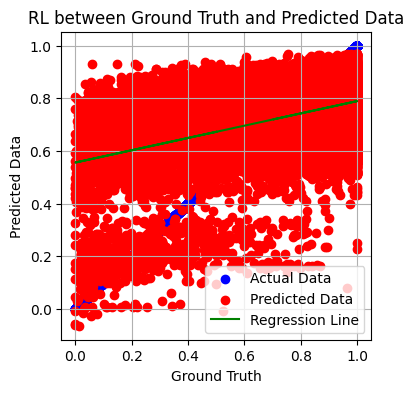

In [ ]:
predicted_data = np.array(y_pred)  # Sample predicted data
slope, intercept = np.polyfit(Y_test, predicted_data, 1)
regression_line = slope * Y_test + intercept

# Plot actual data and predicted data
plt.figure(figsize=(4, 4))
plt.scatter(Y_test, Y_test, color='blue', label='Actual Data')
plt.scatter(Y_test, predicted_data, color='red', label='Predicted Data')
plt.plot(Y_test, regression_line, color='green', label='Regression Line')

# Add labels and title
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Data')
plt.title('RL between Ground Truth and Predicted Data')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

## Prepare Test DataFrame

In [ ]:
test_df = X_test[['DRUG_ID','dose']]
test_df['Actual_Viability'] = Y_test
test_df['Predicted_Viability'] = y_pred

filter = test_df[(test_df.Predicted_Viability < 0.5)]
filter

<ipython-input-42-eab754baff80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Actual_Viability'] = Y_test
<ipython-input-42-eab754baff80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Viability'] = y_pred


,DRUG_ID,dose,Actual_Viability,Predicted_Viability
111,1032,10.0,0.813634,0.288319
132,1058,10.0,0.775083,0.280733
170,1032,10.0,0.854707,0.288319
239,1012,10.0,0.156901,0.097666
240,1012,5.0,0.298952,0.389122
...,...,...,...,...
106819,1372,1.0,0.224435,0.470575
106887,1012,10.0,0.120390,0.181913
106981,1032,5.0,0.395804,0.467534
106982,1032,10.0,0.000000,0.176077


## Calculate IC50

In [ ]:
drug_data = test_df[(test_df.DRUG_ID == 1004)]
drug_data

,DRUG_ID,dose,Actual_Viability,Predicted_Viability
31,1004,0.006250,0.736105,0.879037
32,1004,0.003125,1.000000,0.879219
33,1004,0.001563,0.797493,0.879310
35,1004,0.000391,0.977653,0.879378
88,1004,0.000316,0.978594,0.879383
...,...,...,...,...
106739,1004,0.010002,0.045102,0.635654
106740,1004,0.003163,0.077435,0.636053
106875,1004,0.010002,0.093364,0.766577
106876,1004,0.003163,0.147416,0.766976


In [ ]:
# Calculate the mean of each drug concentration
unique_dose = drug_data.dose.unique()

dic_conc_via = {'Concentration':[],'Actual_Mean':[],'Predicted_Mean':[]}

for val in unique_dose:
  values = drug_data[(drug_data.dose == val)]
  actual_mean = np.mean(values.Actual_Viability)
  predicted_mean = np.mean(values.Predicted_Viability)
  dic_conc_via['Concentration'].append(val)
  dic_conc_via['Actual_Mean'].append(actual_mean)
  dic_conc_via['Predicted_Mean'].append(predicted_mean)

drug_data_df = pd.DataFrame(dic_conc_via)
drug_data_df

,Concentration,Actual_Mean,Predicted_Mean
0,0.006250,0.546690,0.783605
1,0.003125,0.731898,0.794223
2,0.001563,0.883677,0.789971
3,0.000391,0.930657,0.791443
4,0.000316,0.953095,0.816735
5,0.025000,0.406526,0.797131
6,0.012500,0.433846,0.793541
7,0.010002,0.488497,0.806472
8,0.050000,0.355624,0.799594
9,0.031626,0.449483,0.800155


## Logarithmic Function

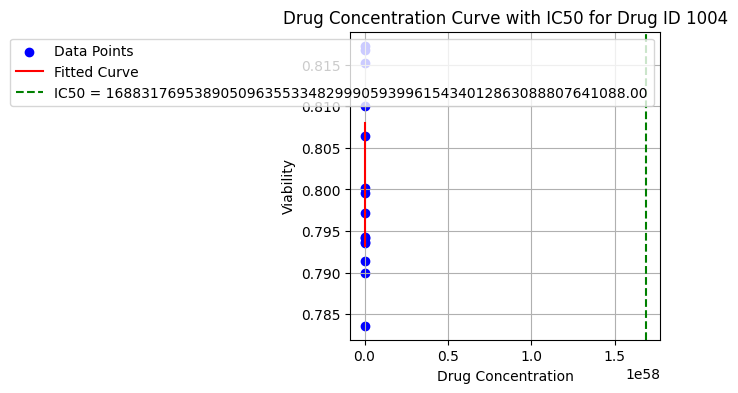

Estimated IC50: 1.688317695389051e+58


In [ ]:
dose = drug_data_df.Concentration  # Example dose values
viability = drug_data_df.Predicted_Mean # Example viability values

def logarithmic(x, A, B):
    return A * np.log(x) + B

# Fit the logarithmic curve to the data
popt, pcov = curve_fit(logarithmic, dose, viability)

# Extract the IC50 value
IC50 = np.exp((0.5 - popt[1]) / popt[0])

# Plot the dose-response curve and IC50
plt.figure(figsize=(4, 4))
plt.scatter(dose, viability, color='blue', label='Data Points')

# Generate x values for smooth curve
x_values = np.linspace(min(dose), max(dose), 100)

# Plot the fitted curve
plt.plot(x_values, logarithmic(x_values, *popt), color='red', label='Fitted Curve')

# Plot vertical line for IC50
plt.axvline(x=IC50, color='green', linestyle='--', label=f'IC50 = {IC50:.2f}')
plt.xlabel('Drug Concentration')
plt.ylabel('Viability')
plt.title('Drug Concentration Curve with IC50 for Drug ID 1004')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

print("Estimated IC50:", IC50)

## Linear Function

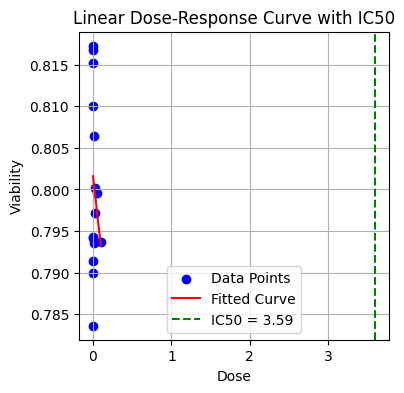

Estimated IC50: 3.5942377914356207


In [ ]:
dose = drug_data_df.Concentration
viability = drug_data_df.Predicted_Mean

# Define the linear function
def linear(x, m, c):
    return m * x + c

# Fit the linear curve to the data
popt, pcov = curve_fit(linear, dose, viability)

# Extract the IC50 value
IC50 = (0.5 - popt[1]) / popt[0]

# Plot the dose-response curve and IC50
plt.figure(figsize=(4, 4))
plt.scatter(dose, viability, color='blue', label='Data Points')

# Generate x values for smooth curve
x_values = np.linspace(min(dose), max(dose), 100)

# Plot the fitted curve
plt.plot(x_values, linear(x_values, *popt), color='red', label='Fitted Curve')

# Plot vertical line for IC50
plt.axvline(x=IC50, color='green', linestyle='--', label=f'IC50 = {IC50:.2f}')
plt.xlabel('Dose')
plt.ylabel('Viability')
plt.title('Linear Dose-Response Curve with IC50')
plt.legend()
plt.grid(True)
plt.show()

print("Estimated IC50:", IC50)

# Lasso

In [ ]:
lasso_regressor = Lasso(alpha=0.1)

# Initialize lists to store evaluation metrics for each fold
mse_scores = []
rmse_scores = []
evs_scores = []
percentage_errors = []

# k-fold cross-validation
num_folds = 5

# Initialize the KFold object
cv = KFold(n_splits=num_folds, shuffle=True, random_state=43)

# Perform k-fold cross-validation and get the cross-validated MSE scores
for i, (train_ix, test_ix) in enumerate(cv.split(X)):

    # Split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]

    # Normalize data
    # X_train,X_test = normalize_data(X_train, X_test)

    # Fit XGBRegressor model
    lasso_regressor.fit(X_train, Y_train)

    # Make predictions on the test data using the best model
    y_pred = lasso_regressor.predict(X_test)

    # Calculate evaluation metrics for this fold
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    evs = explained_variance_score(Y_test, y_pred)
    per_error = mean_absolute_error(Y_test, y_pred)

    # Store evaluation metrics for this fold
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    evs_scores.append(evs)
    percentage_errors.append(per_error)

    # Print evaluation metrics for this fold
    print(f"Fold {i+1} - MSE: {mse}, RMSE: {rmse}, EVS: {evs}, PER: {per_error}")

# Calculate average evaluation metrics across all folds
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_evs = np.mean(evs_scores)
avg_per = np.mean(percentage_errors)

# Print average evaluation metrics
print(f"\nAverage MSE across {num_folds} folds: {avg_mse}")
print(f"Average RMSE across {num_folds} folds: {avg_rmse}")
print(f"Average EVS across {num_folds} folds: {avg_evs}")
print(f"Average Percentage Error across {num_folds} folds: {avg_per}")

Fold 1 - MSE: 0.06742422160041085, RMSE: 0.2596617445840085, EVS: 0.1496697882265291, PER: 0.21510171197740738
Fold 2 - MSE: 0.06950195631688393, RMSE: 0.26363223686962856, EVS: 0.1430678687326048, PER: 0.2186689059787423
Fold 3 - MSE: 0.06855613695653005, RMSE: 0.2618322687457183, EVS: 0.14722517837779814, PER: 0.21731780824936145
Fold 4 - MSE: 0.06821538835776494, RMSE: 0.26118075801590923, EVS: 0.15155240854142626, PER: 0.2175207930303978
Fold 5 - MSE: 0.06802296225977725, RMSE: 0.2608121206151609, EVS: 0.14756710864353018, PER: 0.21678690106940318

Average MSE across 5 folds: 0.0683441330982734
Average RMSE across 5 folds: 0.26142382576608514
Average EVS across 5 folds: 0.14781647050437768
Average Percentage Error across 5 folds: 0.21707922406106245


# Ridge

In [ ]:
ridge_model = Ridge(alpha=100.0)

# Initialize lists to store evaluation metrics for each fold
mse_scores = []
rmse_scores = []
evs_scores = []
percentage_errors = []

# k-fold cross-validation
num_folds = 5

# Initialize the KFold object
cv = KFold(n_splits=num_folds, shuffle=True, random_state=43)

# Perform k-fold cross-validation and get the cross-validated MSE scores
for i, (train_ix, test_ix) in enumerate(cv.split(X)):

    # Split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]

    # Normalize data
    # X_train,X_test = normalize_data(X_train, X_test)

    # Fit XGBRegressor model
    ridge_model.fit(X_train, Y_train)

    # Make predictions on the test data using the best model
    y_pred = ridge_model.predict(X_test)

    # Calculate evaluation metrics for this fold
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    evs = explained_variance_score(Y_test, y_pred)
    per_error = mean_absolute_error(Y_test, y_pred)

    # Store evaluation metrics for this fold
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    evs_scores.append(evs)
    percentage_errors.append(per_error)

    # Print evaluation metrics for this fold
    print(f"Fold {i+1} - MSE: {mse}, RMSE: {rmse}, EVS: {evs}, PER: {per_error}")

# Calculate average evaluation metrics across all folds
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_evs = np.mean(evs_scores)
avg_per = np.mean(percentage_errors)

# Print average evaluation metrics
print(f"\nAverage MSE across {num_folds} folds: {avg_mse}")
print(f"Average RMSE across {num_folds} folds: {avg_rmse}")
print(f"Average EVS across {num_folds} folds: {avg_evs}")
print(f"Average Percentage Error across {num_folds} folds: {avg_per}")

Fold 1 - MSE: 0.06108641873647782, RMSE: 0.24715666840382403, EVS: 0.22957929556322343, PER: 0.19913919569555072
Fold 2 - MSE: 0.06285856583457307, RMSE: 0.25071610605338673, EVS: 0.22497240512379224, PER: 0.20260679292058476
Fold 3 - MSE: 0.06174729870105238, RMSE: 0.2484900374281681, EVS: 0.23190851007982216, PER: 0.20086360596029504
Fold 4 - MSE: 0.06090018680575708, RMSE: 0.2467796320723351, EVS: 0.24257517756731495, PER: 0.1999884328714044
Fold 5 - MSE: 0.06176514565333922, RMSE: 0.24852594563413138, EVS: 0.22599534523004627, PER: 0.20080614987150366

Average MSE across 5 folds: 0.061671523146239915
Average RMSE across 5 folds: 0.24833367791836908
Average EVS across 5 folds: 0.23100614671283984
Average Percentage Error across 5 folds: 0.2006808354638677


## Plot Regression Line

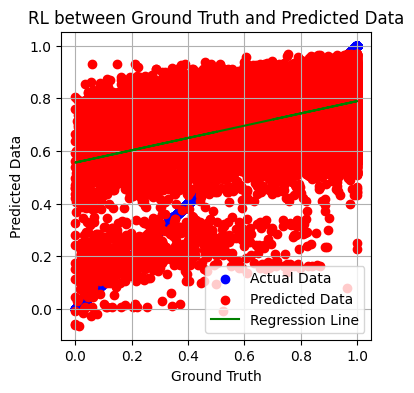

In [ ]:
predicted_data = np.array(y_pred)  # Sample predicted data
slope, intercept = np.polyfit(Y_test, predicted_data, 1)
regression_line = slope * Y_test + intercept

# Plot actual data and predicted data
plt.figure(figsize=(4, 4))
plt.scatter(Y_test, Y_test, color='blue', label='Actual Data')
plt.scatter(Y_test, predicted_data, color='red', label='Predicted Data')
plt.plot(Y_test, regression_line, color='green', label='Regression Line')

# Add labels and title
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Data')
plt.title('RL between Ground Truth and Predicted Data')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

## Prepare Test DataFrame

In [ ]:
test_df = X_test[['DRUG_ID','dose']]
test_df['Actual_Viability'] = Y_test
test_df['Predicted_Viability'] = y_pred

filter = test_df[(test_df.Predicted_Viability < 0.5)]
filter

<ipython-input-53-eab754baff80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Actual_Viability'] = Y_test
<ipython-input-53-eab754baff80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Viability'] = y_pred


,DRUG_ID,dose,Actual_Viability,Predicted_Viability
111,1032,10.0,0.813634,0.288496
132,1058,10.0,0.775083,0.280911
170,1032,10.0,0.854707,0.288496
239,1012,10.0,0.156901,0.097872
240,1012,5.0,0.298952,0.389236
...,...,...,...,...
106819,1372,1.0,0.224435,0.470581
106887,1012,10.0,0.120390,0.182086
106981,1032,5.0,0.395804,0.467615
106982,1032,10.0,0.000000,0.176251


## Calculate IC50

In [ ]:
drug_data = test_df[(test_df.DRUG_ID == 1004)]
drug_data

,DRUG_ID,dose,Actual_Viability,Predicted_Viability
31,1004,0.006250,0.736105,0.879029
32,1004,0.003125,1.000000,0.879211
33,1004,0.001563,0.797493,0.879302
35,1004,0.000391,0.977653,0.879370
88,1004,0.000316,0.978594,0.879375
...,...,...,...,...
106739,1004,0.010002,0.045102,0.635630
106740,1004,0.003163,0.077435,0.636029
106875,1004,0.010002,0.093364,0.766565
106876,1004,0.003163,0.147416,0.766964


In [ ]:
# Calculate the mean of each drug concentration
unique_dose = drug_data.dose.unique()

dic_conc_via = {'Concentration':[],'Actual_Mean':[],'Predicted_Mean':[]}

for val in unique_dose:
  values = drug_data[(drug_data.dose == val)]
  actual_mean = np.mean(values.Actual_Viability)
  predicted_mean = np.mean(values.Predicted_Viability)
  dic_conc_via['Concentration'].append(val)
  dic_conc_via['Actual_Mean'].append(actual_mean)
  dic_conc_via['Predicted_Mean'].append(predicted_mean)

drug_data_df = pd.DataFrame(dic_conc_via)
drug_data_df

,Concentration,Actual_Mean,Predicted_Mean
0,0.006250,0.546690,0.783592
1,0.003125,0.731898,0.794206
2,0.001563,0.883677,0.789960
3,0.000391,0.930657,0.791429
4,0.000316,0.953095,0.816713
5,0.025000,0.406526,0.797113
6,0.012500,0.433846,0.793521
7,0.010002,0.488497,0.806452
8,0.050000,0.355624,0.799574
9,0.031626,0.449483,0.800136


# Linear Function

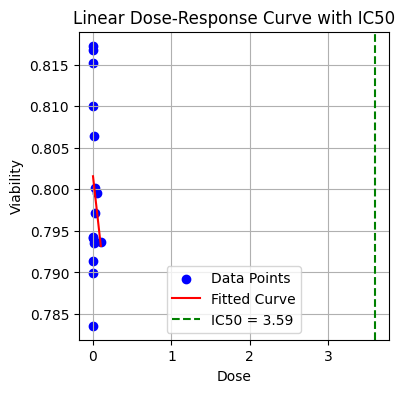

Estimated IC50: 3.593940506998699


In [ ]:
dose = drug_data_df.Concentration
viability = drug_data_df.Predicted_Mean

# Define the linear function
def linear(x, m, c):
    return m * x + c

# Fit the linear curve to the data
popt, pcov = curve_fit(linear, dose, viability)

# Extract the IC50 value
IC50 = (0.5 - popt[1]) / popt[0]

# Plot the dose-response curve and IC50
plt.figure(figsize=(4, 4))
plt.scatter(dose, viability, color='blue', label='Data Points')

# Generate x values for smooth curve
x_values = np.linspace(min(dose), max(dose), 100)

# Plot the fitted curve
plt.plot(x_values, linear(x_values, *popt), color='red', label='Fitted Curve')

# Plot vertical line for IC50
plt.axvline(x=IC50, color='green', linestyle='--', label=f'IC50 = {IC50:.2f}')
plt.xlabel('Dose')
plt.ylabel('Viability')
plt.title('Linear Dose-Response Curve with IC50')
plt.legend()
plt.grid(True)
plt.show()

print("Estimated IC50:", IC50)

# AdaBoostRegressor

In [13]:
from sklearn.tree import DecisionTreeRegressor

base_estimator = DecisionTreeRegressor(max_depth=3)

# Initialize the AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42, learning_rate=0.01)

# Train the AdaBoost Regressor
adaboost_regressor.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = adaboost_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model performance
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.05620321210327407
